In [ ]:
# pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\mca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.15.0


In [ ]:
# !pip install tf_keras

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info = True,
    as_supervised = True
)

In [ ]:
num_classes = dataset_info.features['label'].num_classes

num_training_examples = 0
num_validation_examples = 0

for example in training_set:
    num_training_examples += 1

for example in validation_set:
    num_validation_examples += 1

print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2936
Total Number of Validation Images: 734 



In [ ]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

Unaugmented

In [ ]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [ ]:
feature_extractor.trainable = False

In [ ]:
import tf_keras

In [ ]:
model = tf_keras.Sequential([
  feature_extractor,
  tf_keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
EPOCHS = 10

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10



81/81 [==============================] - 20s 216ms/step - loss: 0.7827 - accuracy: 0.7053 - val_loss: 0.4360 - val_accuracy: 0.8656
Epoch 2/10
81/81 [==============================] - 17s 208ms/step - loss: 0.3889 - accuracy: 0.8731 - val_loss: 0.3513 - val_accuracy: 0.8874
Epoch 3/10
81/81 [==============================] - 17s 216ms/step - loss: 0.3043 - accuracy: 0.9019 - val_loss: 0.3129 - val_accuracy: 0.9028
Epoch 4/10
81/81 [==============================] - 17s 217ms/step - loss: 0.2562 - accuracy: 0.9214 - val_loss: 0.2963 - val_accuracy: 0.9055
Epoch 5/10
81/81 [==============================] - 18s 218ms/step - loss: 0.2205 - accuracy: 0.9369 - val_loss: 0.2895 - val_accuracy: 0.9083
Epoch 6/10
81/81 [==============================] - 26s 317ms/step - loss: 0.1929 - accuracy: 0.9486 - val_loss: 0.2876 - val_accuracy: 0.9064
Epoch 7/10
81/81 [==============================] - 33s 410ms/step - loss: 0.1678 - accuracy: 0.9541 - val_loss: 0.2747 - val_accuracy: 0.9119
Epoch 8/10

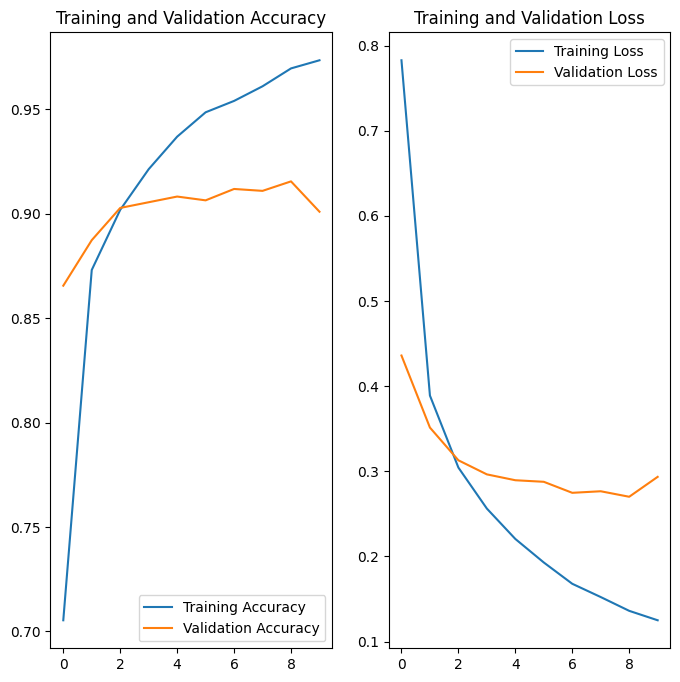

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data Augmentation

In [23]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

In [30]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize
    tf.keras.layers.RandomFlip("horizontal"),  # Apply random flipping
    tf.keras.layers.RandomRotation(0.1),  # Rotate within 20° (0.1*2*180 = 20°)
    tf.keras.layers.RandomZoom(0.2),  # Apply zooming
    tf.keras.layers.RandomBrightness(factor=0.2)  # Adjust brightness
])

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def visualize_keras_augmentations(dataset, num_images=5):
#     plt.figure(figsize=(10, 5))
#     for i, (image, label) in enumerate(dataset.take(num_images)):
#         augmented_image = data_augmentation(tf.expand_dims(image, 0))  # Apply augmentation

#         # Convert tensor to numpy and rescale to [0, 1] for proper visualization
#         img = augmented_image[0].numpy()  # Convert to numpy array
#         img = np.clip(img, 0, 1)  # Ensure values are in [0, 1] range

#         plt.subplot(1, num_images, i + 1)
#         plt.imshow(img)  # Show corrected image
#         plt.axis('off')

#     plt.show()

# visualize_keras_augmentations(training_set)


In [ ]:
# def visualize_keras_augmentations(dataset, num_images=5):
#     plt.figure(figsize=(10, 5))
#     for i, (image, label) in enumerate(dataset.take(num_images)):
#         augmented_image = data_augmentation(tf.expand_dims(image, 0))  # Apply augmentation
#         plt.subplot(1, num_images, i + 1)
#         plt.imshow(augmented_image[0])
#         plt.axis('off')
#     plt.show()

# visualize_keras_augmentations(training_set)


<ipython-input-33-9dd742e2c57b>:3: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0),


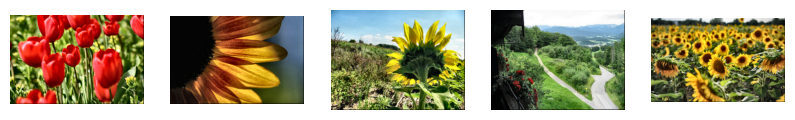

In [33]:
# Define Albumentations Transformations
albumentations_transform = A.Compose([
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0),
    A.GridDistortion(num_steps=5, distort_limit=0.3, p=1.0),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8,8), p=1.0)
])

def apply_albumentations(image):
    image = np.array(image)  # Convert tensor to NumPy
    augmented = albumentations_transform(image=image)['image']
    return augmented

def visualize_albumentations(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        image = tf.keras.preprocessing.image.array_to_img(image)
        augmented_image = apply_albumentations(image)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_image)
        plt.axis('off')
    plt.show()

visualize_albumentations(training_set)


In [36]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [37]:
feature_extractor.trainable = False

In [38]:
model = tf_keras.Sequential([
  feature_extractor,
  tf_keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
import tf_keras

In [40]:
model_aug = tf_keras.Sequential([
  data_augmentation,
  feature_extractor,
  tf_keras.layers.Dense(num_classes)
])
model.summary()

TypeError: The added layer must be an instance of class Layer. Received: layer=<Sequential name=sequential_6, built=True> of type <class 'keras.src.models.sequential.Sequential'>.

In [ ]:
EPOCHS = 10

In [ ]:
model_aug.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history_aug = model_aug.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()